In [1]:
import seaborn as sns
import numpy as np
#from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import utils

In [2]:
dir_tr='data/all_tweet_data_labeld_final_morph_yap.tsv'
df=pd.read_csv(dir_tr,sep="\t",encoding = "utf-8", names=["text", "label"])
df.head()
# dir_ts='data/test_tweet_data_labeld_final_morph_yap.tsv'

# df_ts=pd.read_csv(dir_ts,sep="\t",encoding = "utf-8", names=["tweet", "lable"])
# df_ts.head()


,text,label
0,תתעודדו ! לפחות תקבלו לגליזציה !,0.0
1,אם הייתה כבר לגליזציה ה סגר ה זה היה עובד ל את...,0.0
2,ה מרכז ל בקרת תחלואה בארה ב CDC מזהיר חולים מו...,0.0
3,לבנון עשתה לגליזציה של גידול קנאביס לפני אנחנו...,0.0
4,אוגרים קנאביס לקראת הסגר עלייה ב מכירות ב טלגרם,0.0


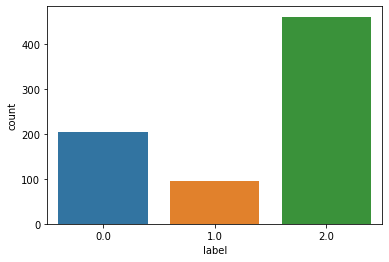

In [3]:
sns.countplot(x='label',data=df)

In [4]:
from train import train_all_models,data_acquisition,cv_data_acquisition,cv_data_pre_processing
from morphamizer import create_morphamaized_file
from utils import get_strongest_words
from evaluate_sentiment import Evaluator


2.0    460
0.0    204
1.0     96
Name: label, dtype: int64
2.0    0.605263
0.0    0.268421
1.0    0.126316
Name: label, dtype: float64


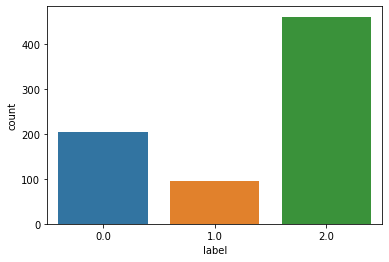

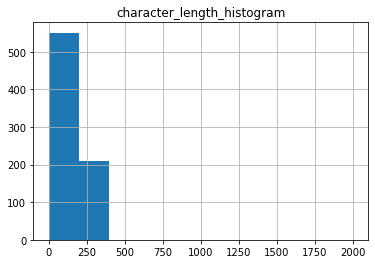

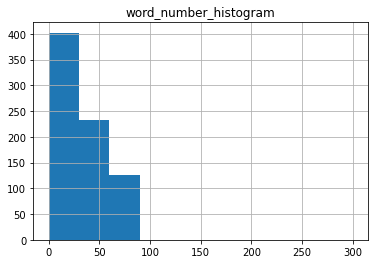

['של', 'את', 'זה', 'אני']


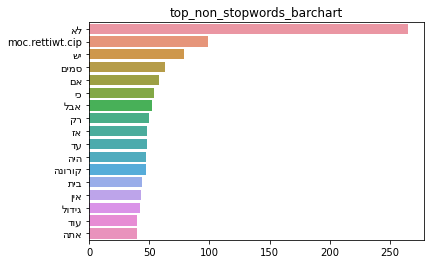

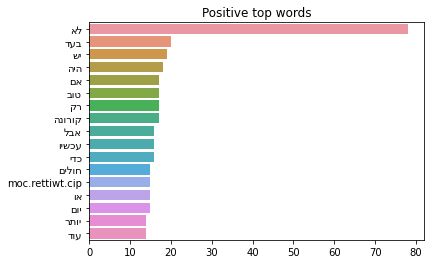

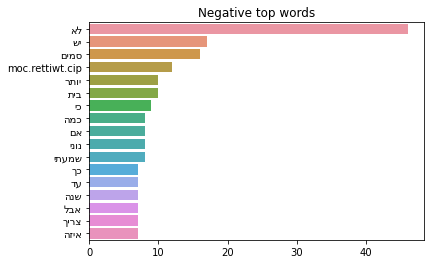

In [5]:

to_morph=False
print_info=True
with_stat=True

#cv data
cv_df = cv_data_acquisition(dir_tr, to_morph, print_info, with_stat)
cv_X_train_counts, cv_X_train_tf, cv_count_vect = cv_data_pre_processing(cv_df.text)


In [6]:

def train_eval_model(clf, name, X_train_tf, label, X_test_tfidf, evaluator, error_analysis=None, help=None):
    if help:
        print(help)
    clf.fit(X_train_tf, label)
    prediction = clf.predict(X_test_tfidf)
    prediction = np.array([np.int64(pred) for pred in prediction])

    print(f"The{name}'s results are: ")
    mic, mac, cm, acc = evaluator.evaluate(prediction)
    print("\n")
    # if error_analysis:todo chekc only here or best
    # print(f'######## ERROR ANALYSIS FOR{name}########')
    # utils.print_error_analysis(prediction, evaluator)

    return clf, mic, mac, cm, acc, prediction

In [7]:
cv_X_train_counts.shape,  cv_X_train_tf.shape

((760, 5709), (760, 5709))

In [8]:
from imblearn.combine import SMOTETomek
y=cv_df.label
y=y.astype(int)
# y_ts=test_df.label
# y_tr=train_df.label
# y_tr=y_tr.astype(int)
# y_ts=y_ts.astype(int)
smk_tr=SMOTETomek()
x_tr_res,y_tr_res=smk_tr.fit_sample(cv_X_train_counts,y)
smk_ts=SMOTETomek()
# x_ts_res,y_ts_res=smk_tr.fit_sample(X_test_counts,y_ts)
from collections import Counter
print(f'original tr ds count{Counter(y)}')
print(f'original tr ds count{Counter(y_tr_res)}')


original tr ds countCounter({2: 460, 0: 204, 1: 96})
original tr ds countCounter({0: 460, 1: 460, 2: 460})


In [9]:
#featurs selection 